# Preparation

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('hr.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.shape

(14999, 10)

Just under 15K observations over 10 columns

In [6]:
# Check for missing data-values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

Arguably, this is a rarity but it is a clean dataset containing no missing values!

In [8]:
# Rename column names 
df = df.rename(columns = {
    
    'satisfaction_level':'Satisfaction',
    'last_evaluation':'Evaluation',
    'number_project' : 'ProjectCount',
    'average_montly_hours':'AvgMonthlyHours',
    'time_spend_company':'Tenure',
    'promotion_last_5years':'Promotion',
    'sales':'Department',
    'salary':'Salary',
    'left':'Turnover'
    
})

In [9]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Breakdown of Summary Statistics

df.describe()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Exploration

# Context

This dataset contains - 

1. Roughly 15K employee observations of 10 parameters; 
2. Turnover rate near 24% (23.8%, in America, around 22% is considered average); 
3. Mean employee satisfaction if 0.612

In [11]:
# Check columns for data-type(s)

df.dtypes

Satisfaction       float64
Evaluation         float64
ProjectCount         int64
AvgMonthlyHours      int64
Tenure               int64
Work_accident        int64
Turnover             int64
Promotion            int64
Department          object
Salary              object
dtype: object

In [12]:
# Confirm turn-over rate

turnover_rate = df.Turnover.value_counts(normalize=True)
turnover_rate

# 76% remained, 24% attrition

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [13]:
turnover_summary = df.groupby('Turnover')
turnover_summary.mean()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation(s)

In [14]:
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
Tenure,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

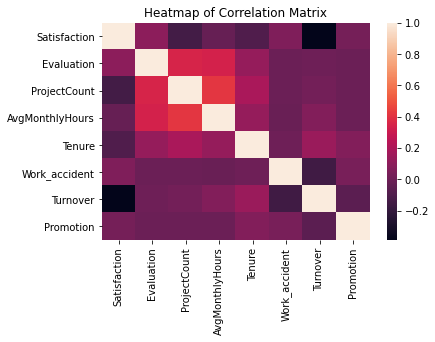

In [15]:
# Heatmap

sns.heatmap(corr)
plt.title('Heatmap of Correlation Matrix')

# Positive correlations

ProjectCount and Evaluation : 0.349333
AvgMonthlyHours and Evaluation : 0.339742  
ProjectCount and AvgMonthlyHours: 0.417211	

# Negative correlations

Satisfaction and Turnover : -0.388375

# Observations

There is a positive correlation within projectCount, averageMonthlyHours, and evaluation. 
This could indicate staff who put in more time and worked on more projects received 
higher evaluations, i.e., the halo effect of being percieved as a 'good' and/or 
dedicated employee. 

Regarding negative(-) relationships, employee turnover and satisfaction are highly 
correlated. 
This could indicate an increased probability staff resign when less satisfied.

# Statistical Test

One Sample T-Test

Hypothesis Testing: Check for a significant difference in the mean of satisfaction level between staff who resigned and the overall employee numbers.

Null Hypothesis: No difference in satisfaction level between employees who left and the overall employee numbers.

Alternate Hypothesis: There is a difference in satisfaction level between staff who departed and the overall employee numbers.

In [18]:
# Compare mean of employee turnover statisfaction and mean of overall employee satisfaction
emp_population_satisfaction = df['Satisfaction'].mean()
emp_turnover_satisfaction = df[df['Turnover']==1]['Satisfaction'].mean()

print( 'The mean for the employee (total) numbers is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees who is: ' + str(emp_turnover_satisfaction) )

The mean for the employee (total) numbers is: 0.6128335222348166
The mean for the employees who is: 0.44009801176140917


In [19]:
# T-Test

import scipy.stats as stats

stats.ttest_1samp(a = df[df['Turnover']==1]['Satisfaction'], # Sample of employee satisfaction who resigned
                  popmean = emp_population_satisfaction)  # The Mean for employee (total) satisfaction

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [20]:
degree_freedom = len(df[df['Turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # For the Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # For the Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


# Result(s)

T-Test, the test statistic within the rejection region; conclude the sample data provides enough evidence 
to support an Alternative Hypothesis.

Additionally, given the low p-value at less than 0.05; the Null Hypothesis can also be rejected.

# Plots

In [22]:
# Check data-frame columns
df.columns

Index(['Satisfaction', 'Evaluation', 'ProjectCount', 'AvgMonthlyHours',
       'Tenure', 'Work_accident', 'Turnover', 'Promotion', 'Department',
       'Salary'],
      dtype='object')

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of AvgMonthlyHour for Employees')

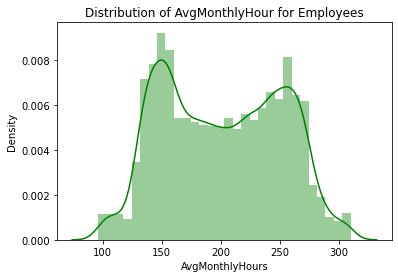

In [23]:
sns.distplot(df.AvgMonthlyHours,color='g').set_title('Distribution of AvgMonthlyHour for Employees')

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall Employee Satisfaction Distribution')

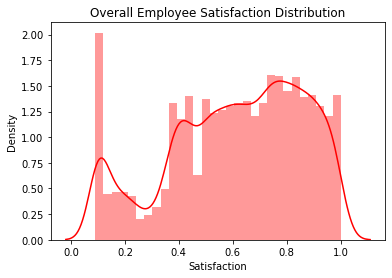

In [24]:
sns.distplot(df.Satisfaction,color ='r').set_title('Overall Employee Satisfaction Distribution')

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Employee Projects')

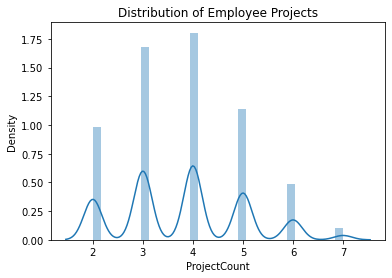

In [25]:
sns.distplot(df.ProjectCount).set_title('Distribution of Employee Projects')

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProjectCount', ylabel='count'>

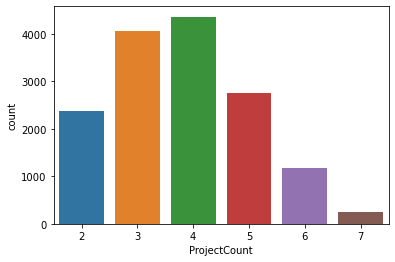

In [26]:
sns.countplot(df.ProjectCount)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Satisfaction     14999 non-null  float64
 1   Evaluation       14999 non-null  float64
 2   ProjectCount     14999 non-null  int64  
 3   AvgMonthlyHours  14999 non-null  int64  
 4   Tenure           14999 non-null  int64  
 5   Work_accident    14999 non-null  int64  
 6   Turnover         14999 non-null  int64  
 7   Promotion        14999 non-null  int64  
 8   Department       14999 non-null  object 
 9   Salary           14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Company Employee Tenure')

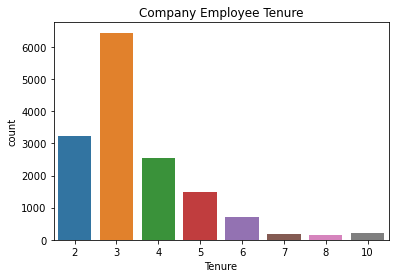

In [28]:
sns.countplot(df.Tenure).set_title('Company Employee Tenure')

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work_accident', ylabel='count'>

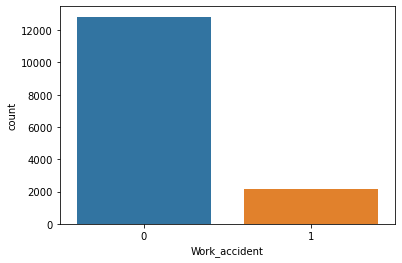

In [29]:
sns.countplot(df.Work_accident)

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

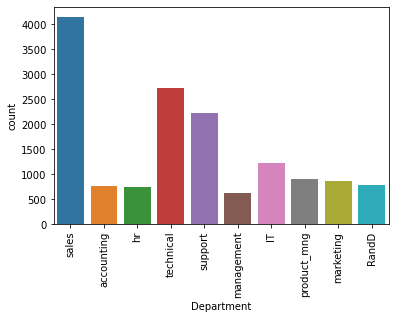

In [30]:
sns.countplot(df.Department)
plt.xticks(rotation=90)

/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Turnover', ylabel='count'>

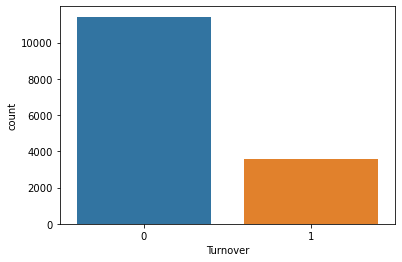

In [31]:
sns.countplot(df.Turnover)

Summary:

1. Average Monthly Hours:  Bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
2. Employee Satisfaction: Contrast between low and high employee satisfaction. 
3. Evaluation: Bimodal distribution of employees for employees with low evaluations (below 0.6) and high evaluations (above 0.8)
4. Highest department for number of employees is Sales.
5. Number of employees with tenure of 3 years is fairly high.
6. Number of on-the-job employee accidents is fairly low.

# Employee Salary to Turnover

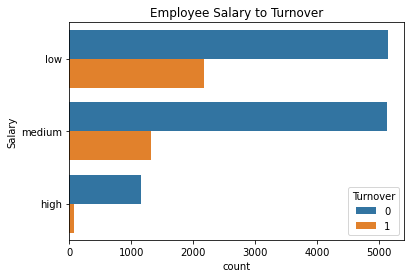

In [36]:
sns.countplot(y="Salary", hue='Turnover', data=df).set_title('Employee Salary to Turnover');

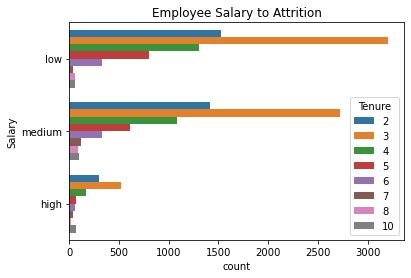

In [37]:
sns.countplot(y="Salary", hue='Tenure', data=df).set_title('Employee Salary to Attrition');

Summary: 
    
1. Low / medium salaries seem to be more likely to resign. 
2. Employees paid higher salaries seem to be the least likely resign.

# Departmental Turnover

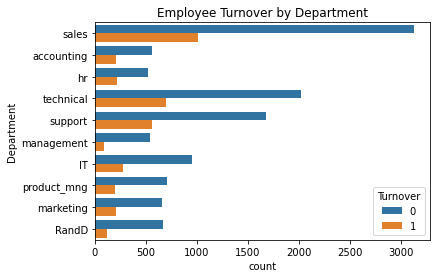

In [39]:
sns.countplot(y="Department", hue='Turnover', data=df).set_title('Employee Turnover by Department');

Summary: 

1. Highest employee turnover Sales, Technical, Support (ranked order) Departments.
2. Lowest employee turnover Management.

# Employee Project Count to Turnover

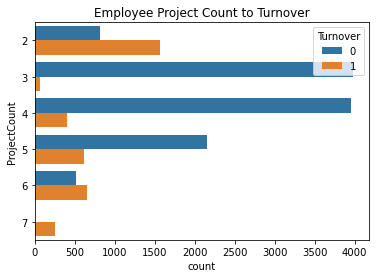

In [40]:
sns.countplot(y="ProjectCount", hue='Turnover', data=df).set_title('Employee Project Count to Turnover');

Summary: 
    
1. Highest employee turnover (ranked order) 2, 6, 7 projects. 
2. Lowest employee turnover (ranked order) 3, 4, 5 projects. 
3. Every employee departed the company 7 projects.

# Employee Evaluation to Turnover

Text(0.5, 1.0, 'Employee Evaluation to Turnover / No Turnover')

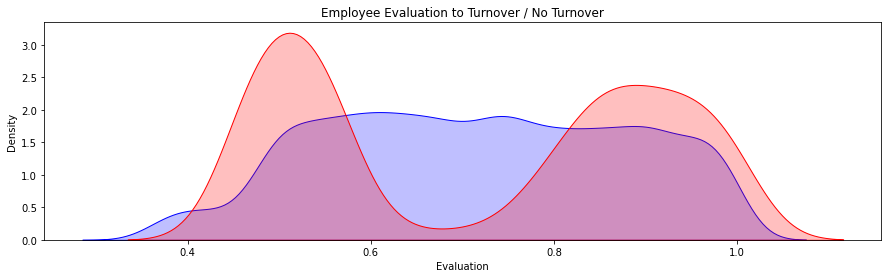

In [42]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Evaluation'] , color='b',shade=True,label='no turnover') # blue
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='turnover') # red
plt.title('Employee Evaluation to Turnover / No Turnover')

Summary: 
    
1. Low / High performance employees (ranked in order) tend to resign the most. 
2. Employees within an evaluation range of 0.6 to 0.8 tend to stay to the company.

# Average Employee Monthly Hours to Turnover

Text(0.5, 1.0, 'Employee Average Monthly Hours to Turnover / No Turnover')

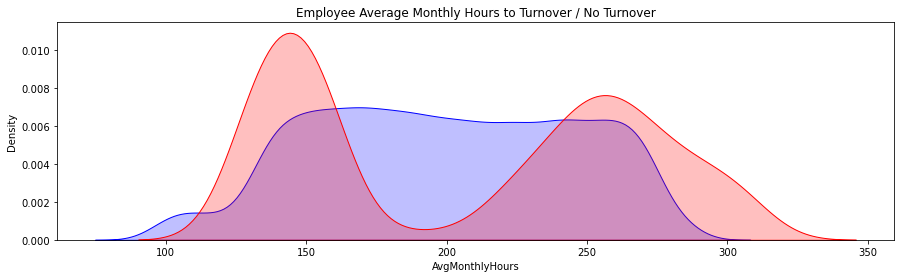

In [43]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'AvgMonthlyHours'] , color='b',shade=True, label='no turnover') # blue
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'AvgMonthlyHours'] , color='r',shade=True, label='turnover') # red
plt.title('Employee Average Monthly Hours to Turnover / No Turnover')

Summary: 
1. Employees working less (150 hours or less) left the at the highest rate.
2. Employees working more (250 hours or more) left the at the second highest rate.
3. Under-utilization or over-utilization seem to be problematic issues needing to be addressed.

# Employee Satisfaction to Turnover

Text(0.5, 1.0, 'Employee Satisfaction to Turnover / No Turnover')

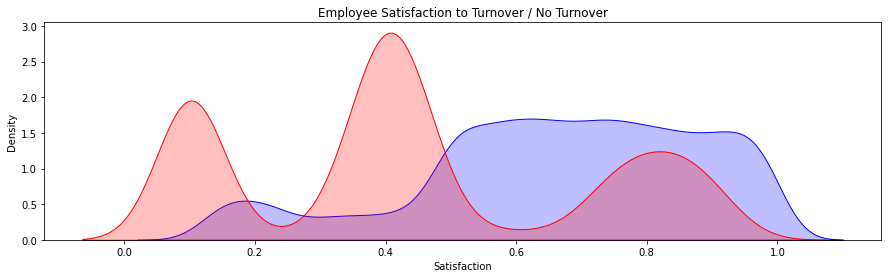

In [44]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Satisfaction'] , color='b',shade=True, label='no turnover') # blue
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='turnover') # red
plt.title('Employee Satisfaction to Turnover / No Turnover')

Summary: 

1. Low employee satisfaction levels (0.3~0.5) had the highest attrition rate.
2. Low employee satisfaction levels (0.2 or less) had the next highest attrition rate.
3. Conversely, high employee satisfaction levels (0.7 or more) had the third highest attrition rate.

# Employee Turnover to Tenure

[Text(0, 0.5, 'Percent')]

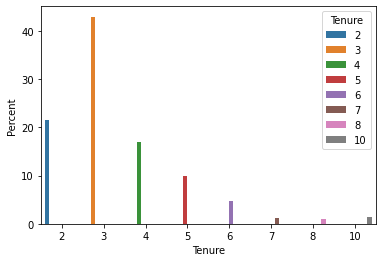

In [49]:
ax = sns.barplot(x='Tenure', y='Tenure', hue='Tenure', data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel='Percent')

Summary: 
1. Employees with under 3 years of tenure had the highest attrition rate. 
2. Employees with under 1 year of tenure had next highest attrition rate.
3. Employees with under 4 years of tenure had next highest attrition rate.
4. Employees with under 5 years of tenure had next highest attrition rate.
5. Employees reaching just over 6 years of tenure began a downward attrition rate 
until it increased again at 10+ years of tenure.

# Employee Work Accidents to Turnover

<AxesSubplot:xlabel='count', ylabel='Work_accident'>

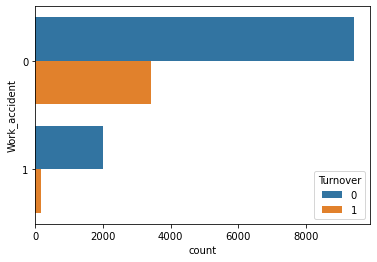

In [51]:
sns.countplot(y = 'Work_accident',hue='Turnover', data=df)

# Employee Promotion to Turnover

<AxesSubplot:xlabel='count', ylabel='Promotion'>

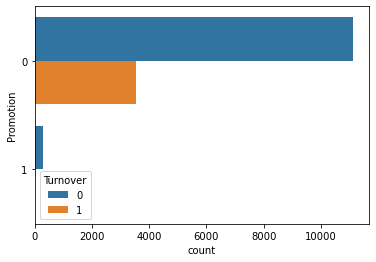

In [52]:
sns.countplot(y = 'Promotion',hue='Turnover', data=df)

Summary: 
    
1. Employees who received a promotion tended to stay at the company.

# Employee Project Count to Evaluation

<AxesSubplot:xlabel='ProjectCount', ylabel='Evaluation'>

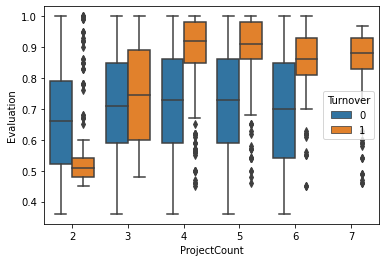

In [56]:
sns.boxplot(x="ProjectCount", y="Evaluation", hue="Turnover", data=df)

Summary: 
1. Employees with an evaluation-average of roughly 70% tended to stay at the company.
2. Skew in employee turnover after 3 projects. 
3. Employees with two projects and a lower evaluation left the company.
4. Employees with more than 3 projects and a higher evaluation left the company.

# Project Count to Average Monthly Hours

<AxesSubplot:xlabel='ProjectCount', ylabel='AvgMonthlyHours'>

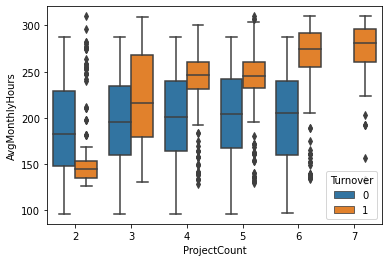

In [57]:
sns.boxplot(x="ProjectCount", y="AvgMonthlyHours", hue="Turnover", data=df)

Summary: 
1. The average employees worked about 200hours/month remained at the company. 
2. Employee turnover for around 150hours/month or 250hours/month worked resulted in a higher attrition rate. 

# Employee Satisfaction to Evaluation

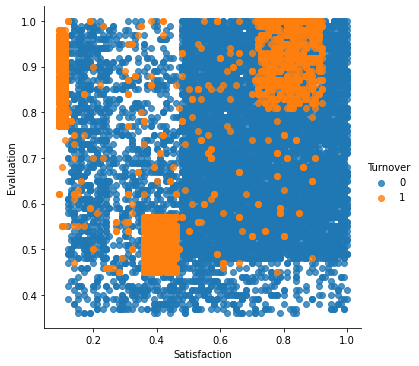

In [58]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=df,
           fit_reg=False, # no regression line
           hue='Turnover')

Summary: 

Three distinct employee clusters -  

Cluster 1: (Worked and Dissatisfied with...)
Employee satisfaction was below 0.2; evaluations were greater than 0.75, could indicate an employee who put in the work but was unsatisfied with the job, the work environment and/or the company. 

Cluster 2: (Worked and Dissatisfied because...)
Employee satisfaction between about 0.35~0.45; evaluations were below ~0.58, could indicate an employee who received a poor evaluation and as a result felt bad about it or for being at the company itself. 

Cluster 3: (Worked and Satisfied about...)
Employee satisfaction between 0.7~1.0; evaluations were greater than 0.8, could indicate an employee who was optimal due to being both satisfied with this job who also received a high performance evaluation (which could be self-reinforcing).

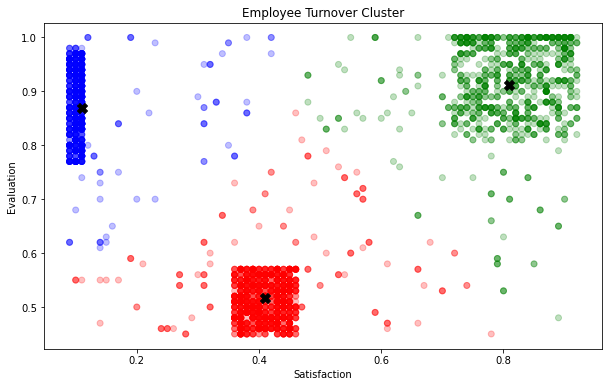

In [59]:
from sklearn.cluster import KMeans

# Employee Turnover Cluster
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.Turnover==1][["Satisfaction","Evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Satisfaction",y="Evaluation", data=df[df.Turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Employee Turnover Cluster")
plt.show()

In [60]:
# Create Dummy Variables
department = pd.get_dummies(data = df['Department'],prefix ='Dep')
salary = pd.get_dummies(data = df['Salary'], prefix = 'Sal')
df.drop(['Department','Salary'],axis = 1, inplace = True)
df = pd.concat([df, department, salary],axis = 1)

In [86]:
# Recheck correlations to confirm these dummy variables are working
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,Tenure,Work_accident,Turnover,Promotion,Dep_IT,Dep_RandD,...,Dep_hr,Dep_management,Dep_marketing,Dep_product_mng,Dep_sales,Dep_support,Dep_technical,Sal_high,Sal_low,Sal_medium
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.006373,0.006615,...,-0.012841,0.007172,0.005715,0.006919,0.004007,0.009185,-0.009345,0.029708,-0.047415,0.031367
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.001269,-0.005471,...,-0.009645,0.009662,-0.000311,-0.001989,-0.023031,0.017104,0.013742,-0.020628,0.005221,0.006191
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.003287,0.009703,...,-0.027356,0.009728,-0.023064,0.000829,-0.013388,0.000303,0.028596,-0.008726,-0.002504,0.007377
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.006967,-0.001177,...,-0.010783,0.000834,-0.008210,-0.005494,-0.001718,-0.002444,0.013638,-0.007101,-0.001050,0.005007
Tenure,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.006053,-0.021116,...,-0.022194,0.115436,0.012096,-0.003919,0.015150,-0.030111,-0.027991,0.039953,-0.040110,0.018299
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.009293,0.017167,...,-0.015649,0.011242,0.011367,0.001246,-0.004955,0.012079,-0.006070,0.009040,-0.006813,0.001856
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.010925,-0.046596,...,0.028249,-0.046035,-0.000859,-0.011029,0.009923,0.010700,0.020076,-0.120929,0.134722,-0.068833
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.038942,0.021268,...,-0.001531,0.128087,0.049253,-0.037288,0.012353,-0.035605,-0.035799,0.076756,-0.082832,0.040985
Dep_IT,0.006373,0.001269,0.003287,0.006967,-0.006053,-0.009293,-0.010925,-0.038942,1.000000,-0.070240,...,-0.067949,-0.062500,-0.073524,-0.075503,-0.184302,-0.124705,-0.140484,-0.016089,0.005116,0.003775
Dep_RandD,0.006615,-0.005471,0.009703,-0.001177,-0.021116,0.017167,-0.046596,0.021268,-0.070240,1.000000,...,-0.053570,-0.049274,-0.057965,-0.059525,-0.145300,-0.098315,-0.110755,-0.015115,-0.011887,0.020402


# Data Modeling

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, precision_score, recall_score, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [62]:
y = df['Turnover']
X = df.drop('Turnover',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15 , random_state = 123, stratify = y)

In [69]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l2', C = 1)
model.fit(X_train,y_train)
print('Accuracy',round(accuracy_score(y_test, model.predict(X_test)),2))
print(confusion_matrix(y_test, model.predict(X_test)))

Accuracy 0.79
[[1580  134]
 [ 343  193]]


/Users/rajeski/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)
print ('\n\n Decision Tree Model')
dt_accuracy = accuracy_score(y_test, dtree.predict(X_test))
print('Decision Tree Accuracy =' ,dt_accuracy)
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ('Decision Tree AUC = %2.2f' % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print(confusion_matrix(y_test, dtree.predict(X_test)))



 Decision Tree Model
Decision Tree Accuracy = 0.944
Decision Tree AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1714
           1       0.88      0.89      0.88       536

    accuracy                           0.94      2250
   macro avg       0.92      0.93      0.92      2250
weighted avg       0.94      0.94      0.94      2250

[[1646   68]
 [  58  478]]


In [79]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight='balanced'
    )
rf.fit(X_train, y_train)
print ('\n\n Random Forest Model')
print('Accuracy =', accuracy_score(y_test, rf.predict(X_test)))
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ('Random Forest AUC = %2.2f' % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))



 Random Forest Model
Accuracy = 0.9862222222222222
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

[[1707    7]
 [  24  512]]


In [80]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ('\n\n AdaBoost Model')
print('Accuracy =', accuracy_score(y_test,ada.predict(X_test)))
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ('AdaBoost AUC = %2.2f' % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))
confusion_matrix(y_test, ada.predict(X_test))



 AdaBoost Model
Accuracy = 0.9506666666666667
AdaBoost AUC = 0.93
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.91      0.88      0.89       536

    accuracy                           0.95      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.95      0.95      0.95      2250



array([[1667,   47],
       [  64,  472]])

In [88]:
print('* Accuracy Comparison *')
print('Accuracy of AdaBoost Model', accuracy_score(y_test,ada.predict(X_test)))
print('Accuracy of Decision Tree Model', accuracy_score(y_test,dtree.predict(X_test)))
print('Accuracy of Logistic Regression Model', accuracy_score(y_test,model.predict(X_test)))
print('Accuracy of Random Forest Model', accuracy_score(y_test,rf.predict(X_test)))

* Accuracy Comparison *
Accuracy of AdaBoost Model 0.9506666666666667
Accuracy of Decision Tree Model 0.944
Accuracy of Logistic Regression Model 0.788
Accuracy of Random Forest Model 0.9862222222222222


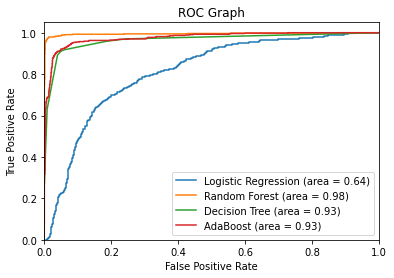

In [82]:
# ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, model.predict(X_test)))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, rf.predict(X_test)))

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, dtree.predict(X_test)))

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, ada.predict(X_test)))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

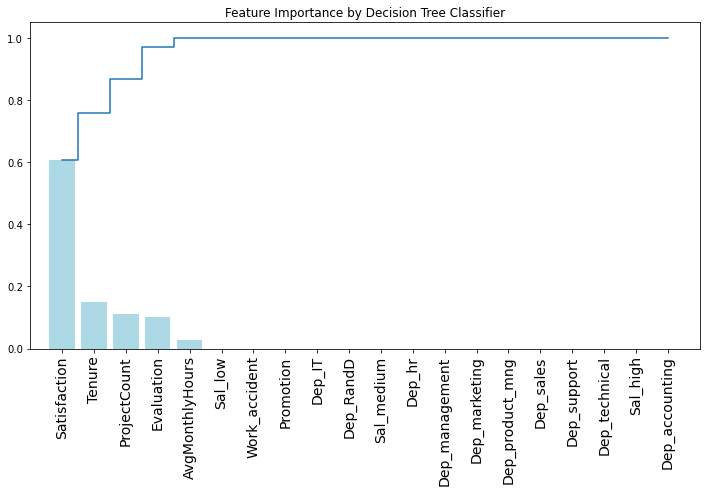

In [83]:
# Feature Importance

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title('Feature Importance by Decision Tree Classifier')
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Conclusions:

Employee Satisfaction, Years At Company, Evaluation are the biggest factors regarding staff turnover.

1. Low to medium salaried employees had higher attrition rates. Conversely, higher-salaried employees has lower attrition rates. 
2. Highest employee turnover (ranked order) Sales, Technical, Support. Conversely, Management lowest employee turnover.
3. High employee turnover 2, 6, 7 projects; most employees with 3, 4, 5 projects remained; all employees with 7 projects left the company.
4. Low to high performance employees tended to leave the most; employee evaluations between 0.6-0.8 tended to remain at the company. 
5. Employees with less hours of work (150 hours or less) or (250 hours or more) had higher attrition rates.
6. Low satisfaction level employees (0.2 or less) or (0.3~0.5) and high satisfaction level employees (0.7 or more) all left the company at higher rates. 
7. More than 1/2 of employees with 4 and 5 years tenure left the company.
8. An average evaluation of roughly 70% meant an employee was likely to stay (even with difference project counts); the data skews towards a high turnover rate after 3 projects or two projects and a lower employee evaluation; employees with more than 3 projects and higher employee evaluations also had higher attrition rates. 
9. Using a Random Forest was the most accurate for data modeling purposes.

Suggestions: 

Use the Kirkpatrick Evaluation Model as part of conducting a Root-cause Analysis 

1. Reaction - Conduct a company-wide survey of all employees
2. Learning - Based on the survey's results implement on-the-job training aimed at reducing attrition rates
3. Behavior - Monitor if desired improvements are being incorporated or if there is still cultural resistance
4. Results - Reduced employee turnover; increased employee evaluation scores 

The above should center on, what are the knowledge, motivation, and organizational solutions to these barriers?

Areas to address include: 

1. Overall attrition-rates
2. Sales, Technical and Support turnover rates, i.e., KPI's; Salary; Management; Career Mobility; finding the possible causes / solutions?
3. Project-related turnover rates; lack of support; level of difficulties; timelines; again, finding the possible causes / solutions?
4. Employee satisfaction; what (if anything) is being done about this? Re-assess management (including Human Resources' policies to find the possible areas where this can be addressed and improved).
5. Employee retention, i.e., in the 4 to 5 year-segment means knowledge, motivation, and organizational is being lost (aside from the people who left with such).
6. Examining why project count; employee evaluation and attrition are correlated and determining causation.